In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import json

In [196]:
with open('li2.json','r') as fp:
    li2 = json.load(fp)

In [197]:
#li2 is tokenized and cleaned version of words of the sentences

In [198]:
li2[0]

['[name]',
 'i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part']

In [199]:
oo = pd.DataFrame(li2)
df = pd.read_csv('data/tweet_emotions.csv')
oo['emotion']=df['sentiment']
oo

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,empty
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,sadness
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,[name],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,love
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,happiness


In [200]:
# droping the duplicates
oon = oo.drop_duplicates()
oon

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,empty
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,sadness
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,Sucesfuly,folowing,Tayla!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,happiness
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,love
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,happiness


In [201]:
ool = oon.iloc[:,:-1]
ool

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,Sucesfuly,folowing,Tayla!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,your,day!,None,None,None,None,None,None,None,None
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [202]:
v = ool.values
v

array([['[name]', 'i', 'know', ..., None, None, None],
       ['Layin', 'n', 'bed', ..., None, None, None],
       ['Funeral', 'ceremony', 'glomy', ..., None, None, None],
       ...,
       ['Hapy', "Mother's", 'Day', ..., None, None, None],
       ['[name]', 'WASUP', 'BEAUTIFUL!', ..., None, None, None],
       ['[name]', 'bulet', 'train', ..., None, None, None]], dtype=object)

In [203]:
vo =[]
for i in range(len(v)):
    vo.append((v[i][v[i]!=None]).tolist())

In [204]:
vo[0]

['[name]',
 'i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part']

In [222]:
seql = pd.Series([len(x) for x in vo])

In [223]:
quant = seql.quantile([0.25,0.5,0.95])
quant

0.25     7.0
0.50    12.0
0.95    25.0
dtype: float64

In [224]:
# as we can the 95% of sequence lengths falls under 25, but max length is 33
# padding all the lengths to 33 will lead to redundancy 
# but padding only to the 25 lenth and truncating remaining tokens will also lead to loss of data

In [225]:
# so, we will try to padd the sequences to 27-29

### padding the sequences

In [226]:
max_size = max(len(x) for x in vo)

In [227]:
padded_sequences =[]
for i in vo:
    if(28-len(i)<0):
        j = i[:28]
        padded_sequences.append(j)
    else:
        j = i + (['<null>']*(28-len(i)))
        padded_sequences.append(j)

In [228]:
len(padded_sequences)

39626

In [229]:
x = padded_sequences
y = oon['emotion']

In [232]:
unique_class = y.unique()
num_classes=len(unique_class)
num_classes

13

In [233]:
unique_class

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [234]:
xx = np.array(x)
yy = y.values

In [235]:
xx.shape,yy.shape

((39626, 28), (39626,))

In [236]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(yy)
y_int

array([ 2, 10, 10, ...,  7,  5,  7])

In [237]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,y_int,test_size=0.4,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23775, 28) (23775,)
(15851, 28) (15851,)


In [238]:
x_train[0],unique_class[y_train[0]]

(array(['[name]', 'Sometimes', 'I', 'wish', 'Twiter', 'had', "Facebok's",
        'quotlikequot', 'just', 'so', 'I', 'could', 'give', 'you', 'a',
        'thumbs', 'up', 'Great', 'job', 'either', 'way', 'I', 'suck', 'to',
        'btw', '<null>', '<null>', '<null>'], dtype='<U53'),
 'fun')

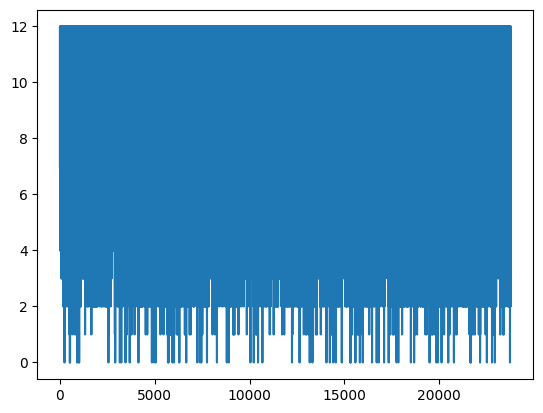

In [239]:
plt.plot(y_train)

In [240]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape) 

(7925, 28) (7925,)
(7926, 28) (7926,)


### Hybrid sampling

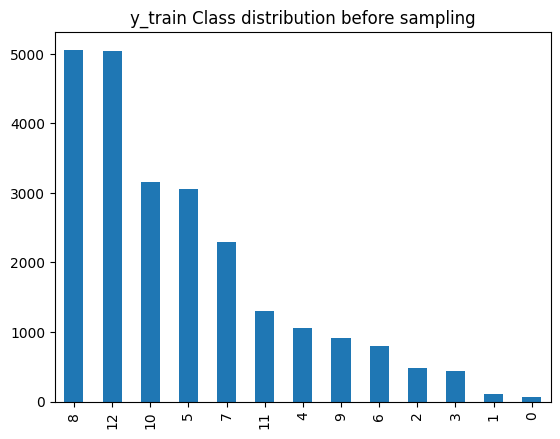

In [241]:
class_dist = pd.Series(y_train).value_counts()
class_dist.plot(kind='bar')
plt.title("y_train Class distribution before sampling")
plt.show()

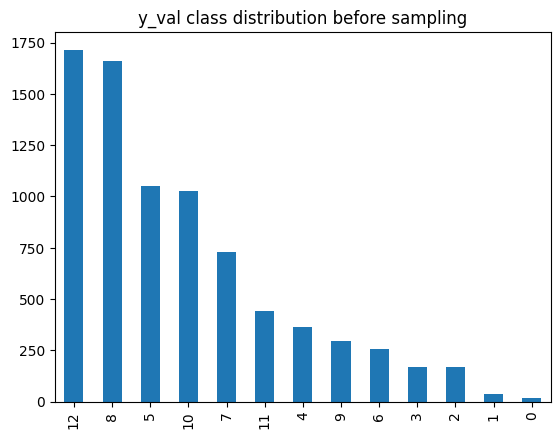

In [242]:
class_y = pd.Series(y_val).value_counts()
class_y.plot(kind='bar')
plt.title("y_val class distribution before sampling")
plt.show()

In [243]:
freq = pd.Series(y_train).value_counts()
freq

8     5060
12    5039
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
2      487
3      442
1      103
0       69
Name: count, dtype: int64

In [244]:
freq1 = {}
freq2 = {}
for i,j in enumerate(freq):
    if(j<801):
        freq1[freq.index[i]]=800
    elif(j>3149):
        freq2[freq.index[i]]=3149
freq1,freq2

({2: 800, 3: 800, 1: 800, 0: 800}, {8: 3149, 12: 3149})

In [245]:
freq0 = pd.Series(y_val).value_counts()
freq0

12    1716
8     1662
5     1051
10    1024
7      727
11     442
4      365
9      296
6      258
3      166
2      166
1       36
0       16
Name: count, dtype: int64

In [246]:
freq11 = {}
freq22 = {}
for i,j in enumerate(freq0):
    if(j<300):
        freq11[freq0.index[i]]=300
    elif(j>1051):
        freq22[freq0.index[i]]=1051
freq11,freq22

({9: 300, 6: 300, 3: 300, 2: 300, 1: 300, 0: 300}, {12: 1051, 8: 1051})

In [247]:
# there are many ways to balance the classes, 
# 1) as there is high imbalance in our data, we will try class_weights and check whether it is yielding good results
# 2) oversampling using smote and undersampling using randomsampler

In [248]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)\nclass_weights = dict(enumerate(class_weights))\n"

In [249]:
#oversampling using smote or Randomundersampler
#from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=freq1, random_state=42)
X_res, y_res = oversample.fit_resample(x_train, y_train)

oversample1 = RandomOverSampler(sampling_strategy=freq11, random_state=42)
X_val, Y_val = oversample1.fit_resample(x_val,y_val) 

In [250]:
# Note: Don't use smote for generating data for sensual data like tokenized words, because generating synthetic data could be non-sensical 

In [251]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=freq2,random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_res, y_res)

undersample1 = RandomUnderSampler(sampling_strategy=freq22,random_state=42)
X_val_resampled, y_val_resampled = undersample1.fit_resample(X_val, Y_val) 

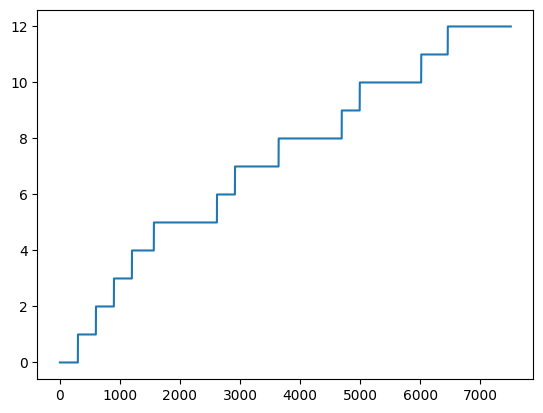

In [252]:
plt.plot(y_val_resampled)

In [253]:
from sklearn.utils import shuffle
X_train_resampled, y_train_resampled = shuffle(X_train_resampled,y_train_resampled,random_state=42)
X_val_resampled, y_val_resampled = shuffle(X_val_resampled, y_val_resampled,random_state=42)

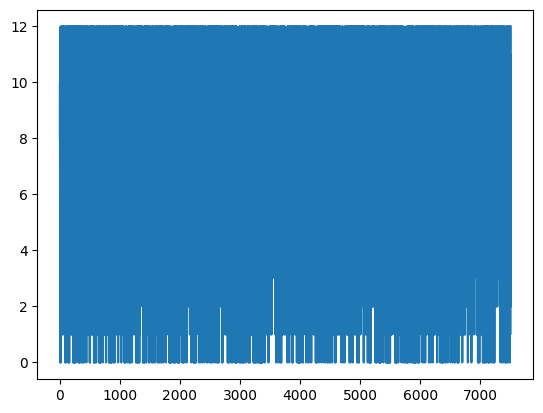

In [254]:
plt.plot(y_val_resampled)

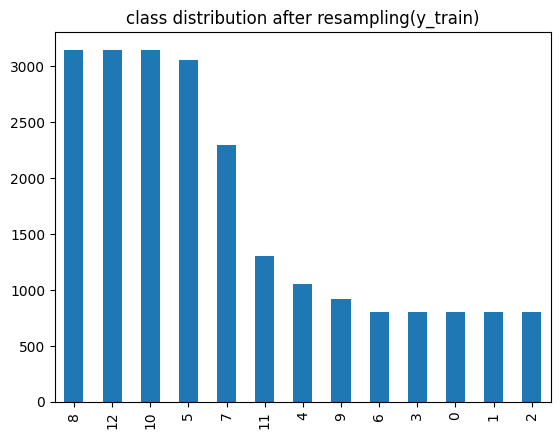

In [255]:
class_dist = pd.Series(y_train_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_train)")
plt.show()

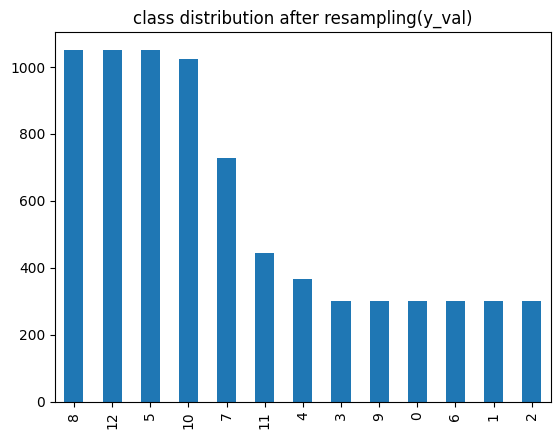

In [256]:
class_dist = pd.Series(y_val_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_val)")
plt.show()

In [257]:
pd.Series(y_train_resampled).value_counts()

8     3149
12    3149
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
3      800
0      800
1      800
2      800
Name: count, dtype: int64

In [258]:
pd.Series(y_val_resampled).value_counts() 

8     1051
12    1051
5     1051
10    1024
7      727
11     442
4      365
3      300
9      300
0      300
6      300
1      300
2      300
Name: count, dtype: int64

In [259]:
# largesample/samplesample = k
# if k>5, high imbalance
# if k<5, mild imbalance

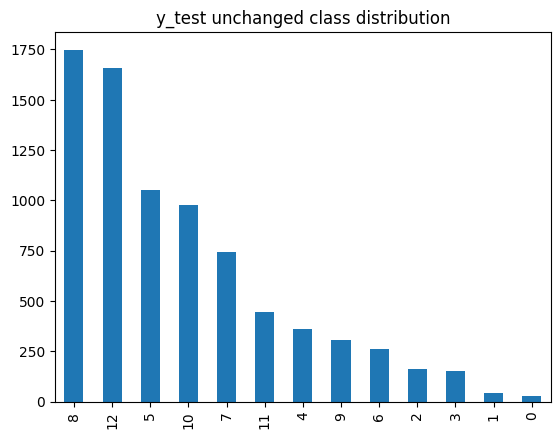

In [260]:
class_dist = pd.Series(y_test).value_counts()
class_dist.plot(kind='bar')
plt.title("y_test unchanged class distribution")
plt.show()

In [261]:
#Note: Generating more random samples may lead to overfitting

In [262]:
x_train.shape,X_train_resampled.shape # we observe there is an decrease or increase in the sample

((23775, 28), (22073, 28))

In [263]:
x_val.shape,X_val_resampled.shape # we observe there is an decrease or increase in the sample

((7925, 28), (7511, 28))

In [264]:
#Note: Oversampling more will lead to redundancy in the data which may leads to overfitting
# Becautious

In [265]:
#len(X_train_resampled)-len(np.unique(X_train_resampled,axis=0)),len(X_val_resampled)-len(np.unique(X_val_resampled,axis=0))
# this indicates there are duplicates in the array

In [266]:
df_train = pd.DataFrame(X_train_resampled)
df_train['emotion']=y_train_resampled
df_train 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
0,[name],Her,new,cd,is,lovely,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
1,[name],"lol,",I,know,how,you,"fel,",but,with,4,...,out,with,no,time,to,grow,things,<null>,<null>,8
2,I,seriously,hate,my,life,it's,curently,"242am,",I,have,...,second,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
3,[name],in,spoke,to,you,yesterday,and,u,didnt,respond,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
4,Your,the,suporter,its,totaly,up,to,you,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22068,[name],Now,there's,a,question,for,140,characters,One,of,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22069,ARGH!,there,is,a,huge,spider,in,the,towel,"pile,",...,the,rest,in,<null>,<null>,<null>,<null>,<null>,<null>,12
22070,starting,the,video,editing,of,the,first,spanking,movie,we,...,next,update,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
22071,is,boiling,in,the,"ofice,",air,con,any1,?,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [267]:
df_traino = df_train.drop_duplicates()
df_traino

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
0,[name],Her,new,cd,is,lovely,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
1,[name],"lol,",I,know,how,you,"fel,",but,with,4,...,out,with,no,time,to,grow,things,<null>,<null>,8
2,I,seriously,hate,my,life,it's,curently,"242am,",I,have,...,second,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
3,[name],in,spoke,to,you,yesterday,and,u,didnt,respond,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
4,Your,the,suporter,its,totaly,up,to,you,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,Eating,Toast,Peanut,"Buter,Yum",<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22068,[name],Now,there's,a,question,for,140,characters,One,of,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22069,ARGH!,there,is,a,huge,spider,in,the,towel,"pile,",...,the,rest,in,<null>,<null>,<null>,<null>,<null>,<null>,12
22070,starting,the,video,editing,of,the,first,spanking,movie,we,...,next,update,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5


In [268]:
df_val = pd.DataFrame(X_val_resampled)
df_val['emotion']=y_val_resampled
df_val

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
0,[name],i,wish,i,was,home,in,bed,naked,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,[name],bye,selena!,to,bad,i,didnt,get,to,talk,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,[name],fine!,Going,to,do,my,big,walk,today,20,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,[name],Where,are,you,at,the,mo,Becks?,Guesing,it's,...,last,yr,Busines,or,holiday?,<null>,<null>,<null>,<null>,3
4,[name],thanks,for,viewing,my,portfolio,I'l,be,updating,it,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,SEe,waT,I,Mean,bOuT,FoL0w,fRiDaYs,It'S,cALed,LoSe,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7507,didnt,enjoy,having,to,say,godbye,to,"alex,",v,emotional,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7508,Is,anyone,else,having,a,bad,Friday?,Is,not,a,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7509,I,forgot,to,complain,about,Southwest,not,doing,preboard,for,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2


In [269]:
df_valo = df_val.drop_duplicates()
df_valo

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
0,[name],i,wish,i,was,home,in,bed,naked,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,[name],bye,selena!,to,bad,i,didnt,get,to,talk,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,[name],fine!,Going,to,do,my,big,walk,today,20,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,[name],Where,are,you,at,the,mo,Becks?,Guesing,it's,...,last,yr,Busines,or,holiday?,<null>,<null>,<null>,<null>,3
4,[name],thanks,for,viewing,my,portfolio,I'l,be,updating,it,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,"Wel,",there,goes,that,shirt,Haha,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
7506,SEe,waT,I,Mean,bOuT,FoL0w,fRiDaYs,It'S,cALed,LoSe,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7507,didnt,enjoy,having,to,say,godbye,to,"alex,",v,emotional,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7508,Is,anyone,else,having,a,bad,Friday?,Is,not,a,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10


In [270]:
indexo = list(df_traino.index)
indexa = list(df_train.index)
indexd = []
for i in indexa:
    if(i not in indexo):
        indexd.append(i)

indexov = list(df_valo.index)
indexav = list(df_val.index)
indexdv = []
for i in indexav:
    if(i not in indexov):
        indexdv.append(i)

In [271]:
len(indexd),len(indexdv)

(2099, 862)

In [272]:
df_traind = df_train.iloc[indexd]
df_traind

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
172,Just,found,out,my,parents,are,puting,down,my,dog,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
251,Internet,is,painfuly,slow,today,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
568,[name],I,used,to,be,but,that,was,a,while,...,troley,pusher,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
604,aw,now,where's,that,litle,asian,girl,who,runs,round,...,her,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
605,Internet,is,painfuly,slow,today,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22042,God,morning,my,sexy,twiter,how's,yal,doing?,I'm,gd,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
22044,i,hav,a,chance,to,win,10,i,was,given,...,the,plant,grow,to,know,if,i,won,anythin!?!,0
22045,Masive,morning,I'm,stufed,now,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
22057,[name],"yes,",bo,for,soar,throats,and,earaches!,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0


In [273]:
df_traind.value_counts()

0           1       2           3      4        5       6         7         8              9       10      11        12      13      14      15      16      17      18        19      20      21       22      23      24      25      26      27      emotion
quotlocked  up      abroadquot  makes  bein     half    brown     god       risk           mgmt    when    travelin  3rd     world   i       blend   i       fel     sory      for     my      hostage  magnet  white   pepo    <null>  <null>  <null>  0          21
[name]      [name]  your        not    talking  about   your      obsesion  with           me      right?  <null>    <null>  <null>  <null>  <null>  <null>  <null>  <null>    <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  0          19
            yup!    Now         I      can      join    in        on        the            nin     aces    fun!      <null>  <null>  <null>  <null>  <null>  <null>  <null>    <null>  <null>  <null>   <null>  <null>  <nul

In [274]:
df_vald = df_val.iloc[indexdv]
df_vald

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
61,[name],bo,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
139,listening,to,faith,spirituality,and,the,internet,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
156,[name],Murphy's,Law?,Sory,that,your,computer,is,not,coperating,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
193,[name],bo,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
227,someone,WOULD,give,a,spech,about,loved,ones,in,the,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,Ian,is,waiting,for,a,very,important,pic,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
7490,[name],I,have,a,2nd,monitor,I,could,use,but,...,Ned,to,make,sure,I,have,the,"rom,",sure,2
7493,[name],Every,time,I,suced,with,a,"code,",I,get,...,this,time,quot,<null>,<null>,<null>,<null>,<null>,<null>,0
7501,[name],thats,another,sponsor,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [278]:
df_vald.value_counts()

0       1         2         3           4       5       6          7         8       9           10         11      12      13      14       15      16      17        18      19      20          21      22      23      24      25      26      27      emotion
[name]  Murphy's  Law?      Sory        that    your    computer   is        not     coperating  when       you     have    lots    of       work    My      kids      are     <null>  <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          29
        smh       Your      whin        with    that    coment     <null>    <null>  <null>      <null>     <null>  <null>  <null>  <null>   <null>  <null>  <null>    <null>  <null>  <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          23
        Every     time      I           suced   with    a          code,     I       get         quotWe're  Sory    Your    Credit  Card     Has     Ben     Declined  at      this    time        quot    <null>  

In [279]:
# now we found duplicate data from the resampled data
# And we will be applying augumentation techniques to it, to maintain the variability in the data

In [280]:
X_train_resampled_dup = df_traind.iloc[:,:-1].values.tolist()
y_train_resampled_dup = df_traind.iloc[:,-1]
X_val_resampled_dup = df_vald.iloc[:,:-1].values.tolist()
y_val_resampled_dup = df_vald.iloc[:,-1]

In [281]:
# leave them as numpy array
X_train_resampled_o = df_traino.iloc[:,:-1]
y_train_resampled_o = df_traino.iloc[:,-1]
X_val_resampled_o = df_valo.iloc[:,:-1]
y_val_resampled_o = df_valo.iloc[:,-1]

In [282]:
print(len(X_train_resampled_o),"+",len(X_train_resampled_dup),len(X_train_resampled))
print(len(y_train_resampled_o),"+",len(y_train_resampled_dup),len(y_train_resampled))
print(len(X_val_resampled_o),"+",len(X_val_resampled_dup),len(X_val_resampled))
print(len(y_val_resampled_o),"+",len(y_val_resampled_dup),len(y_val_resampled))

19974 + 2099 22073
19974 + 2099 22073
6649 + 862 7511
6649 + 862 7511


In [283]:
# Now our data looks kinda balanced

# Note: the highest classes frequency shouldn't be more than 5 times more than the lowest class frequency, otherwise it is high imbalance, 
# >5 high imbalance,<5 moderate imbalance, <3 balance

In [284]:
# As we see there is lot of increase in the sample, as random samples increase the size the duplicating the data
# So, to mitigate it, we will do data agumentation like replacing the words with similar meaning word to increase the variablility in the data

### Data Agumentation (only for duplicate data)

In [285]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [286]:
from nltk.corpus import wordnet
import random
word = 'happy'
synonyms = wordnet.synsets(word)
synonyms

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [287]:
# Replacing the words with thier synonyms

In [288]:
from nltk.corpus import wordnet
import random


# method1 (manually replacing words using nltk)

exceptions = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As']
def augument(words):
    lii = []
    for word in words:
        li =[]
        synonyms = wordnet.synsets(word)
        if(len(synonyms)!=0 and word not in exceptions):
            for i in range(len(synonyms)):
                synonym = synonyms[i].lemmas()[0].name()
                if(synonym!=word):
                    li.append(synonym)
            if(len(li)!=0):
                lii.append(random.choice(li)) 
            else: lii.append(word)
        else:
            lii.append(word)
    return lii


"""
# method2 (using nlpaug library)
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger_eng')
#Initialize the augmenter for synonym replacement
stopwords = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As','<null>','[name]']
synonym_aug = naw.SynonymAug(aug_src='wordnet',stopwords=stopwords)

def augument(words):
    str = " ".join(words)
    syn = synonym_aug.augment(str)
    return syn[0].split()
"""

x_train_augument = []
x_val_augument = []
for i in range(len(X_train_resampled_dup)):
    tempx = augument(X_train_resampled_dup[i])
    x_train_augument.append(tempx)
    
for i in range(len(X_val_resampled_dup)):
    tempxv = augument(X_val_resampled_dup[i])
    x_val_augument.append(tempxv)

In [289]:
len(x_train_augument),len(x_val_augument)

(2099, 862)

In [290]:
# Repeating synonymn replacement

x_train_augument1 = []
x_val_augument1 = []
for i in range(len(x_train_augument)):
    tempx = augument(x_train_augument[i])
    x_train_augument1.append(tempx)
    
for i in range(len(x_val_augument)):
    tempxv = augument(x_val_augument[i])
    x_val_augument1.append(tempxv)

In [291]:
"""
insertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path='bert-base-uncased',top_k=5,stopwords=stopwords)
sample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")
sample
"""

'\ninsertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path=\'bert-base-uncased\',top_k=5,stopwords=stopwords)\nsample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")\nsample\n'

In [292]:
"""
import re
import concurrent.futures
import nlpaug.augmenter.word as naw

# Define the augmentation and cleaning function
def augment_and_clean(sentence):
    augmented_sentence = insertion_aug.augment(" ".join(sentence))
    return func(augmented_sentence[0])[0].split()

def func(x):
    li = []
    x = re.sub(r'([?!.,])\1+', r'\1', x)
    x = re.sub(r'[^a-zA-Z0-9\s\!\?\,\@\']','',x)
    x = re.sub(r'\w*null | tested |\s*test| \s*non','',x)
    x = re.sub(r'\s*UNK',' [name]',x)
    li.append(x)
    return li

# List of sentences to augment
x_train_augument1 = []

# Run in parallel with a thread pool
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(augment_and_clean, x_train_augument))

x_train_augument1.extend(results)
"""

'\nimport re\nimport concurrent.futures\nimport nlpaug.augmenter.word as naw\n\n# Define the augmentation and cleaning function\ndef augment_and_clean(sentence):\n    augmented_sentence = insertion_aug.augment(" ".join(sentence))\n    return func(augmented_sentence[0])[0].split()\n\ndef func(x):\n    li = []\n    x = re.sub(r\'([?!.,])\x01+\', r\'\x01\', x)\n    x = re.sub(r\'[^a-zA-Z0-9\\s\\!\\?\\,\\@\']\',\'\',x)\n    x = re.sub(r\'\\w*null | tested |\\s*test| \\s*non\',\'\',x)\n    x = re.sub(r\'\\s*UNK\',\' [name]\',x)\n    li.append(x)\n    return li\n\n# List of sentences to augment\nx_train_augument1 = []\n\n# Run in parallel with a thread pool\nwith concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:\n    results = list(executor.map(augment_and_clean, x_train_augument))\n\nx_train_augument1.extend(results)\n'

In [293]:
# swapping the words 

In [294]:
import nlpaug.augmenter.word as naw

def custom_tokenizer(text):
    # Merge contractions
    text = re.sub(r"(\w)'(\w)", r"\1'\2", text)
    text = re.sub(r'\[name]','[name]',text)
    tokens = text.split()
    return tokens
    
swap_aug = naw.RandomWordAug(action="swap",tokenizer=custom_tokenizer)
swap_aug.augment("i [name] love eating mushrooms and samosas in the beach and it's very hot ")

["[name] I eating love mushrooms and samosas the in and beach it's hot very"]

In [295]:
# swapping the words in the sentences for more variability

def swap(sentences):
    ll =[]
    for words in sentences:
        str=""
        for i,j in enumerate(words):
            if(i==0):
                str+=j
            else:
                if(j!='<null>'):
                    str+=" "+j
                else: break 
        ss=swap_aug.augment(str)
        ss = ss[0]
        ll.append(ss.split())
    return ll

x_train_augument1 = swap(x_train_augument1)
x_val_augument1 = swap(x_val_augument1)

In [296]:
# swapping agian 
x_train_augument1 = swap(x_train_augument1)
x_val_augument1= swap(x_val_augument1)

In [297]:
print(x_train_augument[100])

['[name]', '[name]', 'your', 'not', 'spill', 'approximately', 'your', 'obsesion', 'with', 'Maine', 'right?', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [298]:
print(x_train_augument1[100])

['[name]', '[name]', 'spillway', 'not', 'your', 'your', 'approximately', 'Maine', 'with', 'obsesion', 'right?']


In [299]:
print(x_val_augument[12])

['[name]', "Murphy's", 'Law?', 'Sory', 'that', 'your', 'calculator', 'constitute', 'not', 'coperating', 'when', 'you', 'get', 'tons', 'of', 'workplace', 'My', 'Kyd', 'constitute', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [300]:
print(x_val_augument1[12])

['[name]', 'Law?', "Murphy's", 'that', 'Sory', 'calculator', 'your', 'form', 'coperating', 'you', 'not', 'when', 'draw', 'long_ton', 'of', 'workplace', 'form', 'My', 'Kyd']


In [301]:
x_train_augument1 = [i + ['<null>']*(len(x_train_augument[0])-len(i)) for i in x_train_augument1]
x_val_augument1 = [i + ['<null>']*(len(x_val_augument[0])-len(i)) for i in x_val_augument1]

In [302]:
# reframing them to dataframe to see the value_counts

In [303]:
len(x_train_augument1),len(y_train_resampled_dup)

(2099, 2099)

In [304]:
len(x_val_augument1),len(y_val_resampled_dup)

(862, 862)

In [305]:
df_train_final = pd.DataFrame(x_train_augument1)
df_train_final['emotion'] = list(y_train_resampled_dup)
df_val_final = pd.DataFrame(x_val_augument1)
df_val_final['emotion']=  list(y_val_resampled_dup)

In [306]:
df_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,emotion
0,detect,precisely,knocked_out,my,establish,glooming,buttocks,pawl,my,put_option,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
1,painfuly,dense,internet,be,present,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
2,[name],secondhand,I,merely,to,be,a,that,be,while,...,baby_buggy,troley,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
3,Present,where's,that,aw,litle,daughter,Asian,World_Health_Organization,toy,polish,...,astatine,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
4,adequate,internet,painfuly,present,drilling,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0


In [307]:
df_train_final.value_counts().head(5)

0          1              2               3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      emotion
Confuzled  <null>         <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          11
Fuckin'm   transtelecom   <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0           5
rest       in             sleep_together  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <nul

In [308]:
temp11 = np.array(df_train_final[df_train_final[0]=='Confuzled'].head(1))
temp5 = np.array(df_train_final[df_train_final[0]=="Fuckin'm"].head(1))
temp11,temp5

(array([['Confuzled', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', 0]], dtype=object),
 array([["Fuckin'm", 'transtelecom', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', 0]],
       dtype=object))

In [309]:
df_train_final = df_train_final[df_train_final[0]!='Confuzled']
df_train_final = df_train_final[df_train_final[0]!="Fuckin'm"]

In [310]:
df_train_final.value_counts().head()

0               1               2               3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      emotion
rest            in              sleep_together  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          4
[name]          flicitations!   <null>          <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  3          3
Feling          and             sicken          slep    can't   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>

In [311]:
df_train_final = pd.concat([df_train_final,pd.DataFrame(temp11,columns=df_train_final.columns)])
df_train_final = pd.concat([df_train_final,pd.DataFrame(temp5,columns=df_train_final.columns)])

In [312]:
len(df_train_final)

2085

In [313]:
len(df_val_final)

862

In [314]:
df_val_final.value_counts().head()

0           1       2       3          4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      emotion
MOtherfuck  QW      <null>  <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          18
[name]      bo      <null>  <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  1          17
deadlines!  <null>  <null>  <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2           3
[name]      smh     Your  

In [315]:
temp12 = np.array(df_val_final[df_val_final[0]=='MOtherfuck'].head(1))
temp52 = np.array(df_val_final[df_val_final[1]=="bo"].head(1))
temp12,temp52

(array([['MOtherfuck', 'QW', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', 0]], dtype=object),
 array([['[name]', 'bo', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
         '<null>', '<null>', '<null>', 1]], dtype=object))

In [316]:
df_val_final = df_val_final[df_val_final[0]!='MOtherfuck']
df_val_final = df_val_final[df_val_final[1]!="bo"]

In [317]:
df_val_final.value_counts().head()

0           1       2           3          4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      emotion
deadlines!  <null>  <null>      <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          3
I           wish!   [name]      <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          2
[name]      in      clearwater  <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2          2
            s

In [318]:
df_val_final = pd.concat([df_val_final,pd.DataFrame(temp12,columns=df_val_final.columns)])
df_val_final = pd.concat([df_val_final,pd.DataFrame(temp52,columns=df_val_final.columns)])

In [319]:
len(df_val_final)

829

In [320]:
# Now we can see that there are all unique values, no duplicacy is found in the data

In [321]:
xtarg = df_train_final.iloc[:,:-1].values
ytarg = df_train_final.iloc[:,-1].values
xvarg = df_val_final.iloc[:,:-1].values
yvarg = df_val_final.iloc[:,-1].values

In [322]:
print(X_train_resampled_o.shape,xtarg.shape)
print(y_train_resampled_o.shape,ytarg.shape)
print(X_val_resampled_o.shape,xvarg.shape)
print(y_val_resampled_o.shape,yvarg.shape) 

(19974, 28) (2085, 28)
(19974,) (2085,)
(6649, 28) (829, 28)
(6649,) (829,)


In [323]:
X_train_resampled_m=np.vstack([X_train_resampled_o,xtarg])
y_train_resampled_m = np.hstack([y_train_resampled_o,ytarg])
X_val_resampled_m = np.vstack([X_val_resampled_o,xvarg])
y_val_resampled_m = np.hstack([y_val_resampled_o,yvarg])

In [324]:
y_train_resampled_m

array([5, 8, 12, ..., 1, 0, 0], dtype=object)

In [325]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(23775, 28) (23775,)
(7925, 28) (7925,)


In [326]:
print(X_train_resampled_m.shape,y_train_resampled_m.shape)
print(X_val_resampled_m.shape,y_val_resampled_m.shape)

(22059, 28) (22059,)
(7478, 28) (7478,)


In [327]:
def arraytolist(arr):
    li =[]
    for i in arr:
        li.append(list(i))
    return li

Xtl = arraytolist(X_train_resampled_m)
xvl = arraytolist(X_val_resampled_m)
xl = arraytolist(x_test)

In [328]:
z =[]
z.extend(Xtl)
z.extend(xvl)
z.extend(xl)
len(z)

37463

In [329]:
print(z[0])

['[name]', 'Her', 'new', 'cd', 'is', 'lovely', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [330]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(z)
encoded = tokenizer.texts_to_sequences(z)

In [331]:
print(encoded[0])

[2, 99, 73, 1311, 14, 435, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [332]:
tokenizer.word_index.items()

dict_items([('<null>', 1), ('[name]', 2), ('i', 3), ('to', 4), ('the', 5), ('a', 6), ('my', 7), ('and', 8), ('you', 9), ('it', 10), ('of', 11), ('in', 12), ('for', 13), ('is', 14), ('so', 15), ('on', 16), ('that', 17), ('have', 18), ('be', 19), ('me', 20), ("i'm", 21), ('but', 22), ('with', 23), ('just', 24), ('not', 25), ('at', 26), ('day', 27), ('was', 28), ('this', 29), ('god', 30), ('al', 31), ('get', 32), ('out', 33), ('now', 34), ('your', 35), ('like', 36), ("it's", 37), ('up', 38), ('are', 39), ('love', 40), ('no', 41), ('go', 42), ('got', 43), ('do', 44), ('going', 45), ('im', 46), ('hapy', 47), ('from', 48), ('work', 49), ('lol', 50), ("don't", 51), ('today', 52), ('what', 53), ('we', 54), ('realy', 55), ('wil', 56), ('about', 57), ('one', 58), ('u', 59), ('back', 60), ('am', 61), ('time', 62), ('as', 63), ('know', 64), ('when', 65), ('se', 66), ("can't", 67), ('its', 68), ('if', 69), ('had', 70), ('can', 71), ('some', 72), ('new', 73), ('how', 74), ('there', 75), ('stil', 76)

In [333]:
vocab_size = len(tokenizer.word_index)+1
vocab_size # so, we have vocab_size unique words in our all combined sequence

37190

In [334]:
# after NER and augumentation, the number of unique words reduced from to 37480 , which significantly reduces overfitting of the model
# and good scope for generalization

### word vectors

In [335]:
# we will be using pretrained Glove to create word vectors for our sequences
# the file is downloaded locally, and we will find the corressponding word vector by mapping our words with it

In [336]:
# Load the GloVe embeddings
"""
import numpy as np
embedding_index = {}
embedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences

with open('D:/ds/dl/rnn/archive/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape) 
"""

'\nimport numpy as np\nembedding_index = {}\nembedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences\n\nwith open(\'D:/ds/dl/rnn/archive/glove.6B.100d.txt\', encoding="utf8") as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype=\'float32\')\n        embedding_index[word] = coefs\n\n# Create the embedding matrix\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\nfor word, i in tokenizer.word_index.items():\n    embedding_vector = embedding_index.get(word)\n    if embedding_vector is not None:\n        embedding_matrix[i] = embedding_vector\n\nprint("Embedding matrix shape:", embedding_matrix.shape) \n'

In [337]:
# we will be using word2vec to train on our custom words and generate word vectors
# because glove may not containa all the word vectors, where the words will be unique to our data 

In [339]:
print(z[4])

['Your', 'the', 'suporter', 'its', 'totaly', 'up', 'to', 'you', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [340]:
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
# Here, `size` is the embedding dimension, and `window` is the context window size
model = Word2Vec(sentences=z, vector_size=200, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

In [341]:
#sample
model = Word2Vec.load("word2vec.model")
word_vector = model.wv["sad"]
word_vector

array([-0.5246808 , -0.7434009 , -0.376118  , -0.36670002,  0.87328506,
       -0.06684493, -0.06380473, -0.50176907, -0.2472887 ,  0.8772314 ,
       -0.72531605, -0.36125544,  0.39631   ,  0.30249622, -0.09116403,
       -0.38690126, -0.04796346, -0.48787546,  0.45623204,  0.06839091,
        0.22598086, -0.18452178, -0.27138212,  0.5589887 , -0.79893446,
       -0.08053792, -0.07181626, -0.79505944, -0.01413132, -0.17924915,
        0.86691755,  0.6800714 , -0.23545614,  0.45363498,  0.64458585,
        0.39800683, -0.4138022 ,  0.17079975, -0.21660432, -0.74028313,
        0.1670163 , -0.38260028,  0.12273249,  0.18589965,  0.05041927,
        0.64143175,  0.2808061 , -1.6063868 ,  0.46699983, -0.22683275,
        0.2135515 , -0.64306515,  0.09167017, -0.6551319 , -0.23419659,
        0.18280165, -0.21455462, -0.61910355, -0.681997  , -0.35050467,
       -0.32862708, -0.40010574,  0.06336954,  0.03599784, -0.33758354,
        0.43605712, -0.21574327,  0.24466   ,  0.06400035,  0.60

In [342]:
len(word_vector)

200

In [343]:
import random
embedding_matrix = np.zeros((vocab_size, 200))
model = Word2Vec.load("word2vec.model")
for i,ind in tokenizer.word_index.items():
    try:
        embedding_matrix[ind]=model.wv[i] 
    except:
        random_floats = [random.uniform(-3, 3) for i in range(200)]
        embedding_matrix[ind]=random_floats
embedding_matrix 

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11167234, -0.4112244 , -0.23047088, ..., -0.14559978,
         0.80421442, -1.98172081],
       [-0.23696923, -0.94441193,  0.20774348, ..., -0.06735031,
         0.47165146, -0.67075568],
       ...,
       [-0.39624303, -2.42336597,  1.24230644, ...,  1.28252676,
         0.00401357,  2.94344771],
       [-0.83784693, -1.11081667, -0.69730161, ..., -0.71717719,
         2.02898433,  2.48536943],
       [-0.0029838 , -0.01598989,  0.00444244, ...,  0.00932173,
        -0.01350716,  0.02881201]])

In [344]:
embedding_matrix.shape

(37190, 200)

In [345]:
# the word vectors in embedded matrix are also stored in the same order as word_index 

In [346]:
len(encoded)

37463

In [347]:
l1= len(Xtl)
l2 = len(xvl)
l1,l2

(22059, 7478)

In [348]:
ll = l1+l2
ll

29537

In [349]:
ll-l2 

22059

In [350]:
len(encoded)-ll # y_test length

7926

In [351]:
x_train_final = encoded[:l1]
x_val_final = encoded[l1:ll]

In [352]:
x_train_final = np.array(x_train_final)
x_val_final = np.array(x_val_final)

In [353]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled_m,num_classes=13)
y_test_hot = to_categorical(y_test,num_classes=13)
y_val_hot = to_categorical(y_val_resampled_m,num_classes=13)
y_train_hot.shape,y_val_hot.shape ,y_test_hot.shape

((22059, 13), (7478, 13), (7926, 13))

In [354]:
print(x_train_final.shape,y_train_hot.shape)
print(x_val_final.shape,y_val_hot.shape)
print(x_test.shape,y_test_hot.shape)

(22059, 28) (22059, 13)
(7478, 28) (7478, 13)
(7926, 28) (7926, 13)


In [355]:
x_train_final

array([[   2,   99,   73, ...,    1,    1,    1],
       [   2,  818,    3, ...,  282,    1,    1],
       [   3,  735,  141, ...,    1,    1,    1],
       ...,
       [  12, 5439, 1394, ...,    1,    1,    1],
       [8313,    1,    1, ...,    1,    1,    1],
       [7532, 7533,    1, ...,    1,    1,    1]])

In [356]:
# shuffle the data
from sklearn.utils import shuffle
x_train_final,y_train_hot = shuffle(x_train_final,y_train_hot,random_state=42)
x_val_final,y_val_hot = shuffle(x_val_final,y_val_hot,random_state=42)

In [357]:
x_train_final

array([[   2, 1185,   34, ...,    1,    1,    1],
       [   3,  243,    5, ...,    1,    1,    1],
       [ 451,  363,    1, ...,    1,    1,    1],
       ...,
       [   2,   78,   41, ...,   12,  544,  131],
       [   2,  259, 5108, ...,    1,    1,    1],
       [   2,  552,  246, ...,    1,    1,    1]])

In [358]:
# Now all our data is ready and as well as the embedded matrix which is created by word2vec

In [359]:
pd.Series(y_train_resampled_m).value_counts()

8     3149
12    3149
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
3      800
1      800
2      800
0      786
Name: count, dtype: int64

In [360]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) 
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight('balanced',classes= np.unique(y_train_resampled_m), y=y_train_resampled_m) \nclass_weight_dict = dict(enumerate(class_weights))\nclass_weight_dict\n"

### DL model

In [371]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten, MultiHeadAttention
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=200, weights=[embedding_matrix],trainable=False))
model.add(Bidirectional(GRU(128,return_sequences=True)))
model.add(Bidirectional(GRU(64,return_sequences=True,dropout=0.3)))
model.add(LayerNormalization())

model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer=l2(0.006)))
model.add(LeakyReLU(0.2)) # to avoid dead neurons
model.add(LayerNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,kernel_regularizer=l2(0.005)))
model.add(LeakyReLU(0.2))
model.add(LayerNormalization())
model.add(Dropout(0.3))


model.add(Dense(num_classes,activation='softmax')) 

In [372]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for one-hot encoded lables

In [ ]:
history = model.fit(x_train_final,y_train_hot,epochs=20,batch_size=32,validation_data=(x_val_final,y_val_hot)) 

Epoch 1/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 62s 65ms/step - accuracy: 0.1355 - loss: 3.6024 - val_accuracy: 0.1824 - val_loss: 2.5120
Epoch 2/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.1964 - loss: 2.3809 - val_accuracy: 0.2346 - val_loss: 2.2655
Epoch 3/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.2389 - loss: 2.2094 - val_accuracy: 0.2542 - val_loss: 2.2261
Epoch 4/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.2628 - loss: 2.1551 - val_accuracy: 0.2646 - val_loss: 2.1665
Epoch 5/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.2809 - loss: 2.1108 - val_accuracy: 0.2625 - val_loss: 2.2192
Epoch 6/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.2877 - loss: 2.0888 - val_accuracy: 0.2856 - val_loss: 2.2044
Epoch 7/20
690/690 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3064 - loss: 2.0404

In [ ]:
#Layernormalization - Feautre wise normalization instead of batch_size

In [632]:
type(history)

keras.src.callbacks.history.History

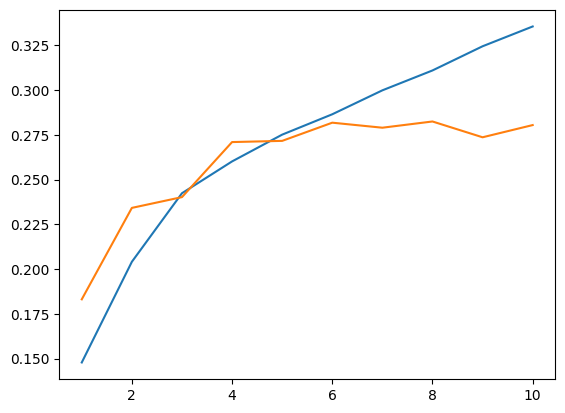

In [374]:
plt.plot([i for i in range(1,11)],history.history['accuracy'])
plt.plot([i for i in range(1,11)],history.history['val_accuracy'])
plt.show()

In [376]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │     7,438,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_13          │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_14          │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_15          │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,438,000 (28.37 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,438,000 (28.37 MB)

In [ ]:
x_testt = tokenizer.texts_to_sequences(x_test.tolist())
x_testt = np.array(x_testt)

In [341]:
# now evaluate on y_test (unseen data) (metrics: accuracy,precision,recall,f1-score)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(x_testt)

248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [357]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test_hot,axis=1)

In [363]:
acc = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test,average='weighted')

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [364]:
acc,precision,recall,f1

(0.2891748675246026,
 0.3933474128762612,
 0.2891748675246026,
 0.32535759025265915)